
# Housing Price Prediction and Analysis  
**Author:** Parth Suri
Final Project - Real Estate Investment Trust  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("housing_20000.csv")   # or use part file e.g. housing_20000_part1.csv
df.head()

,id,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_living15,grade,view,waterfront,floors,lat,long
0,1787846414,0,302811,3,1.49,908,459,449,796,3,4,0,2.0,47.404911,-121.848906
1,3563451924,1,447490,4,1.98,1978,1042,936,1964,4,0,0,2.0,47.695683,-122.454434
2,5537253172,2,734046,3,3.63,1944,1626,318,2043,10,0,0,1.0,47.506717,-122.347557
3,8395928407,3,565266,2,1.96,1552,939,613,1435,10,0,0,1.5,47.305602,-121.909794
4,5298312065,4,330003,4,2.36,1003,771,232,1055,9,0,0,2.0,47.166928,-122.088634


In [2]:
df.dtypes

id                 int64
Unnamed: 0         int64
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_above         int64
sqft_basement      int64
sqft_living15      int64
grade              int64
view               int64
waterfront         int64
floors           float64
lat              float64
long             float64
dtype: object

In [3]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_living15,grade,view,waterfront,floors,lat,long
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.202237e+05,3.245900,2.013270,1768.013600,1323.458800,444.55480,1597.551100,7.003200,0.320650,0.005250,1.524725,47.450899,-121.999341
std,3.776254e+05,1.318264,0.780273,1156.436225,918.916442,423.50364,1110.126335,3.728858,0.856487,0.072268,0.622772,0.202564,0.287777
min,2.000000e+04,1.000000,0.500000,300.000000,150.000000,1.00000,180.000000,1.000000,0.000000,0.000000,1.000000,47.100002,-122.499985
25%,2.697938e+05,2.000000,1.460000,980.000000,704.000000,154.00000,849.000000,4.000000,0.000000,0.000000,1.000000,47.275122,-122.247408
50%,4.248425e+05,3.000000,2.010000,1485.000000,1088.000000,328.00000,1310.000000,7.000000,0.000000,0.000000,1.000000,47.448693,-121.999291
75%,6.613320e+05,4.000000,2.540000,2223.000000,1669.000000,600.00000,2013.000000,10.000000,0.000000,0.000000,2.000000,47.625468,-121.752219
max,4.125298e+06,7.000000,5.090000,10000.000000,9739.000000,4992.00000,11863.000000,13.000000,4.000000,1.000000,3.000000,47.799951,-121.500160


In [4]:
df["floors"].value_counts().to_frame()

,count
floors,
1.0,10010
2.0,3960
1.5,3015
2.5,2006
3.0,1009


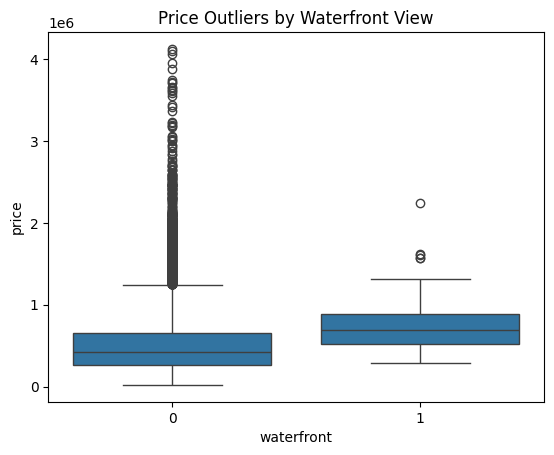

In [5]:
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Price Outliers by Waterfront View")
plt.show()

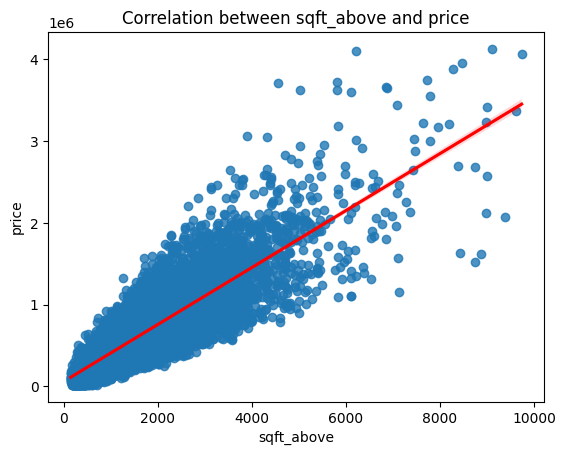

In [6]:
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color":"red"})
plt.title("Correlation between sqft_above and price")
plt.show()

In [7]:
X = df[["sqft_living"]]
y = df["price"]

lm = LinearRegression()
lm.fit(X, y)

r2 = lm.score(X, y)
print("R^2 with sqft_living:", r2)

R^2 with sqft_living: 0.8063749657608313


In [8]:
features = ["floors", "waterfront", "lat", "bedrooms", 
            "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]

lm_multi = LinearRegression()
lm_multi.fit(X, y)

r2_multi = lm_multi.score(X, y)
print("R^2 with multiple features:", r2_multi)

R^2 with multiple features: 0.9310661081008227


In [9]:
Input = [("scale", StandardScaler()), 
         ("polynomial", PolynomialFeatures(degree=2, include_bias=False)), 
         ("model", LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(X, y)

r2_pipe = pipe.score(X, y)
print("R^2 with polynomial pipeline:", r2_pipe)

R^2 with polynomial pipeline: 0.9826916995705233


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

r2_ridge = ridge.score(X_test, y_test)
print("R^2 with Ridge (alpha=0.1):", r2_ridge)

R^2 with Ridge (alpha=0.1): 0.9334047847243996


In [11]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

r2_ridge_poly = ridge_poly.score(X_test_poly, y_test)
print("R^2 with Ridge + Polynomial (alpha=0.1):", r2_ridge_poly)

R^2 with Ridge + Polynomial (alpha=0.1): 0.9825041991840767
